# Project 3 - Classification 

### by João Vidigal

## Dataset and Tools

The dataset to be analysed is again **`AML_ALL_PATIENTS_GENES_LARGE.csv`, already used in Project 1- Clustering. We will now use it for Classification.** As you remember, this is a modified version of the widely studied **Leukemia dataset**, originally published by Golub et al. (1999) ["Molecular Classification of Cancer: Class Discovery and Class Prediction by Gene
Expression Monitoring"](http://archive.broadinstitute.org/mpr/publications/projects/Leukemia/Golub_et_al_1999.pdf.) 

**This dataset studies patients with two different types of leukaemia: acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL). The data analyzed here contains the expression levels of 5147 Human genes (features/columns) analyzed in 72 patients (rows): 47 ALL and 25 AML.**

Each row identifies a patient: The first column, `PATIENT_ID`, contains the patients' IDs , the second column, `PATIENT_DIAGNOSIS`, contains the initial diagnosis as performed by clinicians (ground truth), and the remaining 3051 columns contain the expression levels of the 3051 genes analysed.

**The goal is to learn to classify patients as AML or ALL.**


## 1. Load and Preprocess Dataset

After loading the dataset you should have:
* a 72 rows × 5147 columns matrix, **X**, containing the values of the 5147 features for each of the 72 patients.
* a vector, **y**, with the 72 diagnosis, which will be used to train the classifiers.

### 1.1. Import libraries

In [ ]:
!pip install -U imbalanced-learn

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from my_funct import *

### 1.2. Load data and exploratory data analysis

In [4]:
data = pd.read_csv('AML_ALL_PATIENTS_GENES_LARGE.csv')
data.head()

,PATIENT_ID,PATIENT_DIAGNOSIS,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-HUMGAPDH/M33197_M_at,AFFX-HUMGAPDH/M33197_3_at,...,D64015_at,L10717_at,L78833_cds4_at,M13981_at,M21064_at,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,1,ALL,-0.912181,-0.936280,1.330679,0.045416,0.236442,0.196788,0.244435,2.561725,2.489963,1.794520,-0.029645,-0.528565,-0.203529,...,0.266795,0.343097,0.685649,-0.529272,0.582380,0.428940,1.018678,0.103263,-0.518375,0.019140,0.027771,0.122186,0.593119,-0.391378,-0.161117
1,2,ALL,0.842926,-1.311323,-0.067011,-0.964423,-0.224387,-0.200579,-0.371600,-0.417306,-0.408754,-0.002931,0.698765,0.035392,-0.122523,...,-0.036600,2.472667,-0.342349,-1.342015,-0.747800,-0.425219,-0.474402,-0.067901,0.555431,0.160143,0.003223,-0.043618,0.032103,-0.576990,0.415146
2,3,ALL,1.076941,-0.788133,1.859748,1.151430,0.498175,1.244393,1.390191,0.664072,0.542223,0.548277,2.025297,0.771630,1.078831,...,0.830244,0.725328,1.561351,3.598365,0.224255,2.304741,-0.273350,1.493964,1.747818,-0.568816,0.797680,2.306901,0.705322,-0.331659,-0.261337
3,4,ALL,-1.596222,-0.874097,0.991127,0.574379,-0.065558,-0.044040,-0.402063,0.488835,0.247321,0.266520,-0.055635,-0.456281,-0.240105,...,-0.608718,-0.596098,0.632346,0.210415,0.623308,-0.000930,-0.288936,0.691636,0.548844,-0.552853,-0.342677,-0.653193,-1.336776,-0.496289,-1.514082
4,5,ALL,-0.192137,-0.655253,-0.193356,-0.651854,0.142487,-0.176496,-0.286980,-0.274163,0.379259,-0.311094,-0.100120,0.373027,-0.301228,...,-1.102819,-0.355838,-0.761163,-0.437953,-0.839889,-0.721104,-0.471285,-0.206971,-0.063819,0.325090,-1.183998,0.049037,0.099424,-0.609271,0.139542


In [5]:
data.info() # info about the df (like dtype and memory usage).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Columns: 5149 entries, PATIENT_ID to Z78285_f_at
dtypes: float64(5147), int64(1), object(1)
memory usage: 2.8+ MB


### How unbalanced is the data?

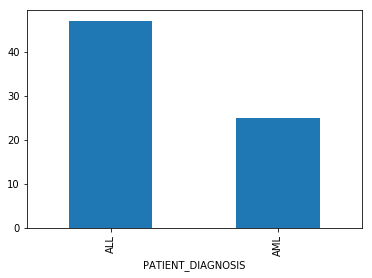

In [6]:
data[['PATIENT_ID','PATIENT_DIAGNOSIS']].groupby(['PATIENT_DIAGNOSIS']).count().plot(kind='bar', legend=False)

The data is clearly imbalanced with ALL being the majority class

### 1.3.3. Split the dataset into the input (X) and output variables (Y)

The first thing is to assign X and Y. Data assigned as an X array is what produces decisions encoded in the Y array.

In [7]:
data_df = data.set_index('PATIENT_ID')
X_data, Y_data = data_df.drop('PATIENT_DIAGNOSIS', axis=1).to_numpy(), data_df['PATIENT_DIAGNOSIS'].to_numpy()

### Imbalanced-learn module

A python library  compatible with scikit-learn that provides a wide range of
resampling methods to cope with the problem of imbalanced dataset.

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

However, because we have a so few patient data we are going to over-sample the minority class.

#### Over-sampling: SMOTE
SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_data, Y_data)

## 2. Learning Simple Classifiers using Cross-Validation

* We Choose **3 classifiers** (https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Logistic regression, decision tree and support vector machines.
* To estimate the best parameters we used **grid-search and stratified 10 fold cross-validation** (https://scikit-learn.org/stable/model_selection.html#model-selection). 
* We used the mean and standard deviation of the accuracy, precision and recall in both train and test as evaluation metrics. Also, the confusion matrices.

### Logistic regression

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#### With the original umbalanced data:

Accuracy score:  0.915 +- 0.071
Precision score: 0.917 +- 0.072
Recall: 0.928 +- 0.061
Confusion matrix:


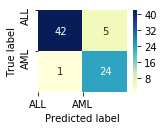

In [10]:
report(logreg, X_data, Y_data)

#### Already with balanced data:

Accuracy score:  0.957 +- 0.052
Precision score: 0.965 +- 0.043
Recall: 0.957 +- 0.052
Confusion matrix:


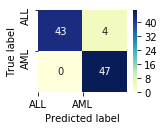

In [11]:
report(logreg, X_sm, y_sm)

#### Grid search cross validation to find the best hyperparameters

Tuned hyperparameters:  {'C': 46.41588833612782, 'penalty': 'l1'}
Accuracy score:  0.978 +- 0.045
Precision score: 0.982 +- 0.037
Recall: 0.978 +- 0.045
Confusion matrix:
CPU times: user 3.02 s, sys: 436 ms, total: 3.45 s
Wall time: 11.6 s


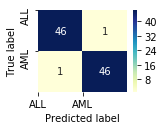

In [12]:
%%time
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from joblib import dump, load
logreg_grid={"C":np.logspace(-5,5,10), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_cv=GridSearchCV(logreg,logreg_grid,cv=3,n_jobs=-1)
report(logreg_cv, X_sm, y_sm, GS=True)

In [13]:
#load ML models with joblib
logreg_best= joblib.load('filename.joblib')

### Discussion:

Logistic regression performs binary classification, so the label outputs are binary. Although other techniques have higher efficiency, logistic regression is still one of the most used algorithms for solving industry scale problems. This is probably because it still is one of the simplest and easiest classification methods, without the need to tune many hyperparameters.

When comparing imbalanced with balanced data, we get definitely better results with the balanced one. So, from now on, this will be the starting point when comparing the different models. 

However, the best results were obtained with hyperparameters tuning; being the tuned parameters {'C': 3.593813663804626, 'penalty': 'l1'} with scores of:

Accuracy score:  0.99 +- 0.03

Precision score: 0.992 +- 0.025

Recall: 0.99 +- 0.03

So, logistic regression is good for classification problems where classes are approximately linearly separable, as we seem to have in this dataset. 

### Decision trees

Accuracy score:  0.893 +- 0.096
Precision score: 0.911 +- 0.084
Recall: 0.893 +- 0.096
Confusion matrix:


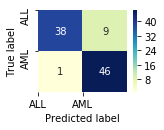

In [14]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
report(logreg, X_sm, y_sm)

In [15]:
dtree.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')>

### Decison tree grid search

/home/vidigal/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/vidigal/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Tuned hyperparameters:  {'max_depth': 1, 'max_leaf_nodes': 100, 'min_samples_leaf': 1, 'min_samples_split': 40}
Accuracy score:  0.842 +- 0.095
Precision score: 0.867 +- 0.086
Recall: 0.842 +- 0.095
Confusion matrix:
CPU times: user 11min 56s, sys: 18.1 s, total: 12min 14s
Wall time: 3min 16s


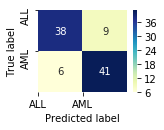

In [16]:
%%time
import dask_ml.model_selection as dcv
dtree_grid = {'max_depth':range(1,20,2),
              'min_samples_leaf':range(1,10,2),
              'min_samples_split' : range(10,100,10),
              "max_leaf_nodes": [ 100 ,1000, 10000]}

dtree_cv=dcv.GridSearchCV(dtree,dtree_grid,cv=3, n_jobs=-1)
report(dtree_cv, X_sm, y_sm, GS=True)

In [17]:
dtree_best= joblib.load('filename.joblib')

### Discusion:
Models obtained from decision trees are intuitive and easier to explain to business, as they could help choose between several courses of action.

However, decision trees are a highly biased class of models. You can make a decision tree model on your training set which might outperform all other algorithms but it will prove to be a poor predictor on your test set. 
In order to avoid that, you will have to rely heavily on hyperparameter search and cross validation to get a good decision tree model.

Also, decision trees can take a lot of memory. This is why we could not properly tune our parameters, in the end having worst results than with the standard parameters.

Simple models like decision trees tend not to have good predicting power and for that reason are rarely used.

### Support Vector Machines

Accuracy score:  0.988 +- 0.038
Precision score: 0.99 +- 0.03
Recall: 0.988 +- 0.038
Confusion matrix:


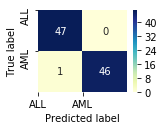

In [18]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
report(svm, X_sm, y_sm)

Tuned hyperparameters:  {'C': 100.0, 'class_weight': None, 'gamma': 0.0001}
Accuracy score:  0.99 +- 0.03
Precision score: 0.992 +- 0.025
Recall: 0.99 +- 0.03
Confusion matrix:
CPU times: user 1min 37s, sys: 2min 53s, total: 4min 31s
Wall time: 1min 8s


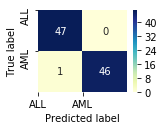

In [19]:
%%time
import dask_ml.model_selection as dcv
svm_grid = {'C': [1e-4, 1e-2, 1, 1e2, 1e4],
               'gamma': [1e-4, 1e-2, 1, 1e2,  1e4],
               'class_weight': [None, 'balanced']}

svm_cv=dcv.GridSearchCV(svm,svm_grid,cv=3, n_jobs=-1)
report(svm_cv, X_sm, y_sm, GS=True)

In [20]:
svm_best= joblib.load('filename.joblib')

### Discussion:
Support Vector Machine (SVM) is a supervised machine learning technique that is widely used in pattern recognition and classification problems.
Having high accuracy, nice theoretical guarantees regarding overfitting, and with an appropriate kernel, they can work well even if your data is not linearly separable in the base feature space.

Results of SVMs are not as intuitive as decision trees or a logistic regression for a layman. Also, SVMs can be very costly to train on huge data and difficult to tune. 
However, this was not the case and with hyperparameter tuning we could achieve the best results.

Tuned hyperparameters:  {'C': 100.0, 'class_weight': None, 'gamma': 0.0001}


### Note:

Generally speaking it is difficult to say which are the best models without prior testing. However, amongst the ones identified previously, the logistic regression and SVM are both good models. The SVM is slightly more accurate, achieving better results. It is also more complex, which makes it difficult to understand its results. Therefore, in the end, the choice of model depends on the need to understand the final output (in which case a simpler model is preferable), or on the accuracy of the final result, regardlessly of how understandable are the results (black models).

## 3. Improving Classification Performance

## 3.1. Feature Selection

### Univariate feature selection with F-test for feature scoring
#### We use the default selection function: the 10% most significant features

### Logistic regression

Accuracy score:  0.97 +- 0.046
Precision score: 0.975 +- 0.038
Recall: 0.97 +- 0.046
Confusion matrix:


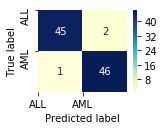

In [21]:
#logreg_best = LogisticRegression(C= 3.593813663804626, penalty= 'l1')
report(logreg_best, X_sm, y_sm, perc_selec=10, sel=True)
logreg_best_sel = joblib.load('filename.joblib')

### Decision Tree

Accuracy score:  0.875 +- 0.074
Precision score: 0.895 +- 0.066
Recall: 0.875 +- 0.074
Confusion matrix:


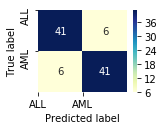

In [22]:
report(dtree_best, X_sm, y_sm, perc_selec=10, sel=True)
dtree_best_sel = joblib.load('filename.joblib')

### Support vector machines

Accuracy score:  0.988 +- 0.038
Precision score: 0.99 +- 0.03
Recall: 0.988 +- 0.038
Confusion matrix:


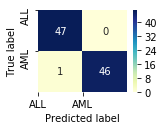

In [23]:
report(svm_best, X_sm, y_sm, perc_selec=10, sel=True)
svm_best_sel = joblib.load('filename.joblib')

### Discussion 

Feature Selection or attribute selection is a process by which you automatically search for the best subset of attributes in your dataset.

Feature selection can be a good solution if we need to reduce the overfitting and train the algorithms faster without losing hardly any accuracy. This is what we see in the data above.

## 3.2. Ensemble Learning

## Voting Classifier

* Used voting classifier (http://scikit-learn.org/stable/modules/ensemble.html#voting-classifier) to combine the best results of the 3 classifiers choosed above (either with or without feature selection). 

Accuracy score:  0.98 +- 0.04
Precision score: 0.983 +- 0.033
Recall: 0.98 +- 0.04
Confusion matrix:


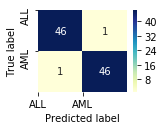

In [25]:
from sklearn.ensemble import VotingClassifier

vclass = VotingClassifier(estimators=[('LogREg', logreg_best_sel), ('dTree', dtree), ('svm', svm_best_sel)], weights=[1,0.5,1], voting='hard')
report(vclass, X_sm, y_sm, perc_selec=10, sel=True)

### Discussion:

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

Voting allows us to combine the three different classifiers. Furthermore, we can add a weight parameter, which allows us to assign a specific weight to each classifier. Since we had lower predictions earlier with decision trees, this classifier will get a lower weight.

The majority rule voting approach might not always work so well in practice, especially if the ensemble consists of more “weak” than “strong” classification models. 

It takes two inputs. The first is our estimator array of our three models. We will set the voting parameter to hard, which tells our classifier to make predicitons by majority vote.

## AdaBoost 

* [AdaBoost](https://scikit-learn.org/stable/modules/ensemble.html#adaboost).

Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

**AdaBoost** was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or or less attention to them in the construction of subsequent models.


Accuracy score:  0.925 +- 0.05
Precision score: 0.938 +- 0.041
Recall: 0.925 +- 0.05
Confusion matrix:


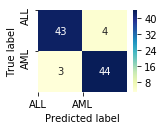

In [26]:
from sklearn.ensemble import AdaBoostClassifier
AdaB = AdaBoostClassifier()
report(AdaB, X_sm, y_sm)

In [27]:
AdaB.get_params

<bound method BaseEstimator.get_params of AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)>

Tuned hyperparameters:  {'n_estimators': 651}
Accuracy score:  0.922 +- 0.088
Precision score: 0.937 +- 0.072
Recall: 0.922 +- 0.088
Confusion matrix:
CPU times: user 1h 43min 36s, sys: 35.5 s, total: 1h 44min 11s
Wall time: 29min 17s


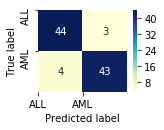

In [32]:
%%time
import dask_ml.model_selection as dcv
AdaB_grid = { "n_estimators": range(1,1000, 50)}

AdaB = AdaBoostClassifier()
AdaB_cv=dcv.GridSearchCV(AdaB,AdaB_grid,cv=3, n_jobs=-1)
report(AdaB_cv, X_sm, y_sm, GS=True)

In [33]:
AdaB_best = joblib.load('filename.joblib')

Accuracy score:  0.945 +- 0.079
Precision score: 0.958 +- 0.056
Recall: 0.945 +- 0.079
Confusion matrix:


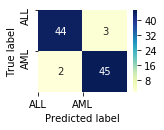

In [34]:
report(AdaB_best, X_sm, y_sm, perc_selec=10, sel=True)

## Random Forests

* [Random Forests](http://scikit-learn.org/stable/modules/ensemble.html#random-forests).

Bootstrap Aggregation or bagging involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.

The final output prediction is averaged across the predictions of all of the sub-models.

**Random forest** is an extension of bagged decision trees.

Accuracy score:  0.98 +- 0.04
Precision score: 0.983 +- 0.033
Recall: 0.98 +- 0.04
Confusion matrix:


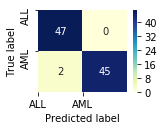

In [35]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
report(RF, X_sm, y_sm)

Tuned hyperparameters:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
Accuracy score:  0.978 +- 0.045
Precision score: 0.982 +- 0.037
Recall: 0.978 +- 0.045
Confusion matrix:


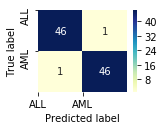

In [37]:
import dask_ml.model_selection as dcv
RF_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

RF_cs =dcv.GridSearchCV(RF,RF_grid,cv=3, n_jobs=-1)
report(RF_cs, X_sm, y_sm, GS=True)

The goal of any machine learning problem is to find a single model that will best predict our wanted outcome. Rather than making one model and hoping this model is the best/most accurate predictor, we can make ensemble methods that take a myriad of models into account, and average those models to produce one final model. It is important to note that Random forests are not the only form of ensemble method, just the most popular and relevant in data science today.